In [2]:
# Imports 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Q2Mod import aggregate
import EoN
from scipy.sparse.linalg import eigsh


In [3]:
# Unpack pickle data
G = pd.read_pickle('networks.pkl')

# Initial Parameters
rho = 1
g, b = 0.16, 0.01
maxTime = 10
maxIter = 50

H = aggregate(G, rho)

In [4]:
eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]*(b/g)

/tmp/ipykernel_9592/3585545990.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]*(b/g)


array([4.00754731])

In [5]:
# Strength of the infection based on SIS is s = \lambda * (\beta / \gamma)

# Pandas dataframe to store the results
df = pd.DataFrame({'Strength of Infection':[], 'Nodes Removed':[]})
# Counter for the number of nodes removed
ctr = 0
# Set an eigens numpy array
eigens = eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]
while np.amin(eigens)*b/g > 1:
    # Find the node with largest degree
    maxDeg = max(H.degree, key=lambda x: x[1])[0]
    # Remove the node with largest degree
    H.remove_node(maxDeg)
    # Reflect change in the counter
    ctr+=1
    # Get Eigen value of the new network
    eigen = eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]
    eigens = np.append(eigens, eigen)
    # Append the results to the dataframe
    df = df.append({'Strength of Infection': np.amin(eigens)*b/g, 'Nodes Removed': ctr}, ignore_index=True)

/tmp/ipykernel_9592/540450715.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigens = eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]
/tmp/ipykernel_9592/540450715.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigen = eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]
/tmp/ipykernel_9592/540450715.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Strength of Infection': np.amin(eigens)*b/g, 'Nodes Removed': ctr}, ignore_index=True)
/tmp/ipykernel_9592/540450715.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigen = eigsh(nx.adjacency_matrix(H).asfptype(), k=1, which='LM')[0]
/tmp/ipykernel_9592/540450715.py:20: FutureWarning: The frame.append method is deprecated and 

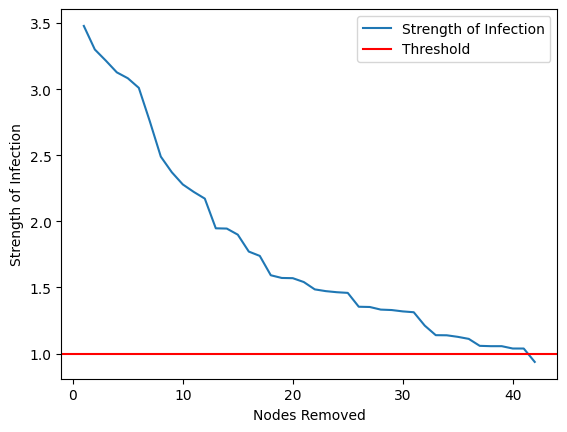

In [12]:
# Plot
plt.plot(df['Nodes Removed'], df['Strength of Infection'], label = 'Strength of Infection')
plt.xlabel('Nodes Removed')
plt.ylabel('Strength of Infection')
plt.axhline(y=1., color='r', linestyle='-', label = 'Threshold')
plt.legend()
plt.savefig(f'Q-2.3.Strength_of_Infection_at_b={b}_and_g={g}.png')
plt.show()

In [7]:
df.tail()

,Strength of Infection,Nodes Removed
37,1.055859,38.0
38,1.055831,39.0
39,1.038166,40.0
40,1.038082,41.0
41,0.936745,42.0
